In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving purchases.txt to purchases.txt


In [ ]:
import numpy as np

In [ ]:
import pandas as pd
df = pd.read_csv('purchases.txt', header= None, sep = '\t')

In [ ]:
df.head(2)

,0,1,2
0,760,25.0,2009-11-06
1,860,50.0,2012-09-28


In [ ]:
df=df.rename(columns={0: 'customer_id', 1: 'purchase_amount',2:"date_of_purchase"})

In [ ]:
df.head(2)

,customer_id,purchase_amount,date_of_purchase
0,760,25.0,2009-11-06
1,860,50.0,2012-09-28


In [ ]:
sum(df["purchase_amount"])

3194344.9000000013

In [ ]:
df.sort_values(by="purchase_amount",ascending = False).head(20)

,customer_id,purchase_amount,date_of_purchase
1208,246480,4500.0,2015-05-19
15348,222740,4500.0,2015-12-31
21719,222740,4500.0,2014-12-31
3874,141340,4419.0,2014-05-21
51228,181800,4000.0,2013-06-12
37798,98790,4000.0,2014-05-27
2757,98550,4000.0,2014-11-21
30473,98790,4000.0,2013-05-09
45120,126120,4000.0,2015-09-04
39097,187390,4000.0,2015-06-17


In [ ]:
df.sort_values(by="purchase_amount",ascending = False).tail(20)

,customer_id,purchase_amount,date_of_purchase
5325,231330,5.0,2014-11-25
32386,59040,5.0,2006-12-31
32271,203490,5.0,2013-10-02
32116,197650,5.0,2013-05-15
5940,54090,5.0,2006-12-05
21152,15370,5.0,2007-07-20
6143,254010,5.0,2015-10-30
43987,119430,5.0,2013-02-04
7376,179570,5.0,2012-08-23
6456,177870,5.0,2012-07-19


In [ ]:
df['date_of_purchase'] =  pd.to_datetime(df['date_of_purchase'], format='%Y-%m-%d',errors='coerce')

In [ ]:
df['Day'] = pd.to_datetime(df.date_of_purchase, format='%d/%m/%Y').dt.day
df['Month'] = pd.to_datetime(df.date_of_purchase, format='%d/%m/%Y').dt.month
df['Year'] = pd.to_datetime(df.date_of_purchase, format='%d/%m/%Y').dt.year
df['weekday']= pd.to_datetime(df.date_of_purchase, format='%d/%m/%Y').dt.weekday

In [ ]:
df["Year"].unique()

array([2009, 2012, 2005, 2013, 2006, 2007, 2010, 2011, 2014, 2008, 2015])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51243 entries, 0 to 51242
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       51243 non-null  int64         
 1   purchase_amount   51243 non-null  float64       
 2   date_of_purchase  51243 non-null  datetime64[ns]
 3   Day               51243 non-null  int64         
 4   Month             51243 non-null  int64         
 5   Year              51243 non-null  int64         
 6   weekday           51243 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 2.7 MB


In [ ]:
def time_analysis(df):
    return pd.DataFrame({"Average":np.mean(df.purchase_amount),"Count":np.size(df.purchase_amount),"Sum":sum(df.purchase_amount)},index=["Time"] )

In [ ]:
df_yearly=df.groupby('Year').apply(time_analysis).reset_index()

In [ ]:
df_yearly

,Year,level_1,Average,Count,Sum
0,2005,Time,55.826122,1470,82064.40
1,2006,Time,52.250454,2182,114010.49
2,2007,Time,49.264014,4674,230260.00
3,2008,Time,53.071780,4331,229853.88
4,2009,Time,50.745253,5054,256466.51
5,2010,Time,58.740012,4939,290116.92
6,2011,Time,63.519300,4785,303939.85
7,2012,Time,62.913312,5960,374963.34
8,2013,Time,67.931357,5912,401610.18
9,2014,Time,75.390347,5739,432665.20


In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


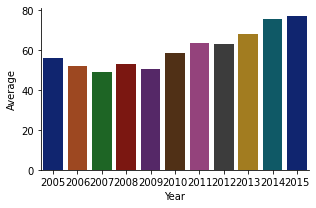

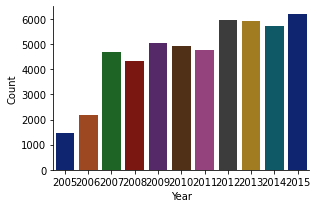

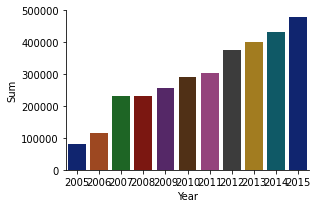

In [ ]:
sns.catplot(x="Year", y="Average", kind="bar", data=df_yearly,color="c",palette="dark",height=3, aspect=1.5)
sns.catplot(x="Year", y="Count", kind="bar", data=df_yearly,color="g",palette="dark",height=3, aspect=1.5)
sns.catplot(x="Year", y="Sum", kind="bar", data=df_yearly,color="m",palette="dark",height=3, aspect=1.5)

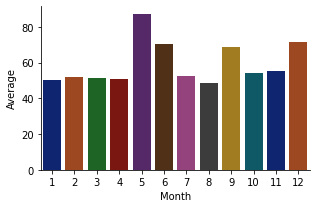

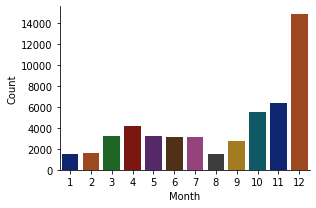

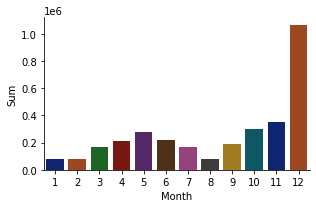

In [ ]:
df_monthly=df.groupby('Month').apply(time_analysis).reset_index()
sns.catplot(x="Month", y="Average", kind="bar", data=df_monthly,color="c",palette="dark",height=3, aspect=1.5)
sns.catplot(x="Month", y="Count", kind="bar", data=df_monthly,color="g",palette="dark",height=3, aspect=1.5)
sns.catplot(x="Month", y="Sum", kind="bar", data=df_monthly,color="m",palette="dark",height=3, aspect=1.5)

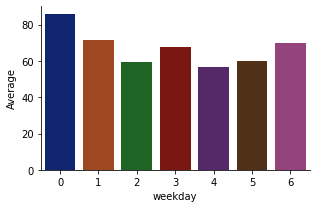

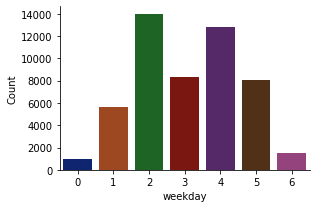

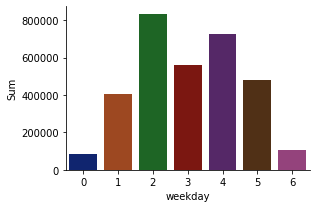

In [ ]:
df_weekly=df.groupby('weekday').apply(time_analysis).reset_index()
sns.catplot(x="weekday", y="Average", kind="bar", data=df_weekly,color="c",palette="dark",height=3, aspect=1.5)
sns.catplot(x="weekday", y="Count", kind="bar", data=df_weekly,color="g",palette="dark",height=3, aspect=1.5)
sns.catplot(x="weekday", y="Sum", kind="bar", data=df_weekly,color="m",palette="dark",height=3, aspect=1.5)

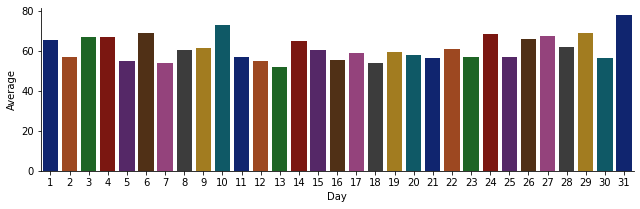

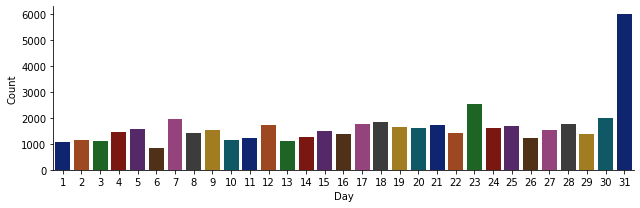

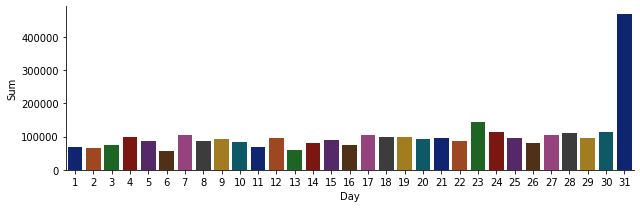

In [ ]:
df_daily=df.groupby('Day').apply(time_analysis).reset_index()
sns.catplot(x="Day", y="Average", kind="bar", data=df_daily,color="c",palette="dark",height=3, aspect=3)
sns.catplot(x="Day", y="Count", kind="bar", data=df_daily,color="g",palette="dark",height=3, aspect=3)
sns.catplot(x="Day", y="Sum", kind="bar", data=df_daily,color="m",palette="dark",height=3, aspect=3)

In [ ]:
from datetime import datetime

def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

In [ ]:
df["date_of_purchase"] = df["date_of_purchase"].astype(str)
l=[]
for i in range(0,len(df["date_of_purchase"])):
  l.append(days_between("2016-01-01",df["date_of_purchase"].iloc[i]))
df["day_since"]=l

In [ ]:
def rfm(df):
    return pd.DataFrame({"Recency":min(df.day_since),"Frequency":np.size(df.purchase_amount),"AvgAmount":np.mean(df.purchase_amount)},index=["RFM"] )

In [ ]:
df_rfm=df.groupby('customer_id').apply(rfm).reset_index()
df_rfm.head()

,customer_id,level_1,Recency,Frequency,AvgAmount
0,10,RFM,3829,1,30.000000
1,80,RFM,343,7,71.428571
2,90,RFM,758,10,115.800000
3,120,RFM,1401,1,20.000000
4,130,RFM,2970,2,50.000000


In [ ]:
df_rfm.describe()

,customer_id,Recency,Frequency,AvgAmount
count,18417.000000,18417.000000,18417.000000,18417.000000
mean,137573.510887,1253.037900,2.782375,57.792985
std,69504.599881,1081.437868,2.936888,154.360109
min,10.000000,1.000000,1.000000,5.000000
25%,81990.000000,244.000000,1.000000,21.666667
50%,136430.000000,1070.000000,2.000000,30.000000
75%,195100.000000,2130.000000,3.000000,50.000000
max,264200.000000,4014.000000,45.000000,4500.000000


In [ ]:
from matplotlib import pyplot as plt 

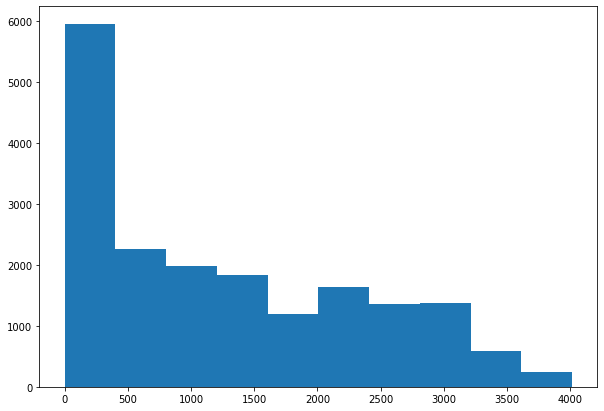

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(df_rfm["Recency"]) 
plt.show() 

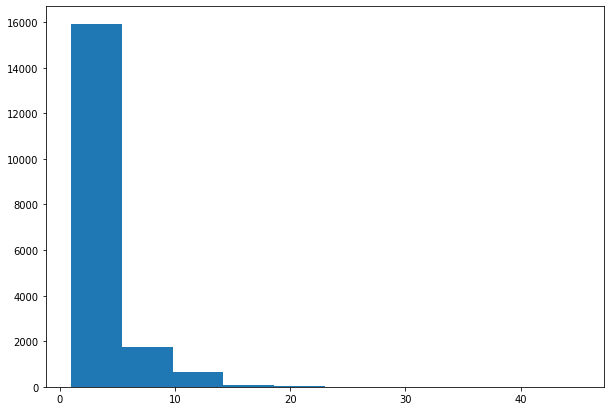

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(df_rfm["Frequency"]) 
plt.show() 

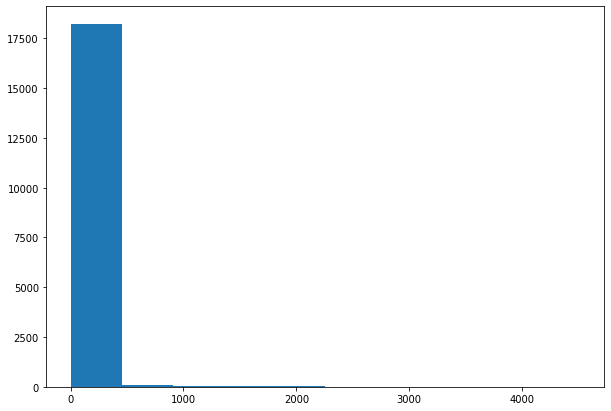

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(df_rfm["AvgAmount"]) 
plt.show()

In [ ]:
df_new = df_rfm.set_index('customer_id')

In [ ]:
df_new=df_new.drop(["level_1"],axis=1)
df_new.head(2)

,Recency,Frequency,AvgAmount
customer_id,,,
10,3829,1,30.000000
80,343,7,71.428571


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18417 entries, 10 to 264200
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    18417 non-null  int64  
 1   Frequency  18417 non-null  int64  
 2   AvgAmount  18417 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 575.5 KB


In [ ]:
df_new1=df_new.copy()

In [ ]:
import math
for i in range (0, len(df_new["AvgAmount"])):
  df_new1["AvgAmount"].iloc[i]= math.log((df_new1["AvgAmount"]).iloc[i])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


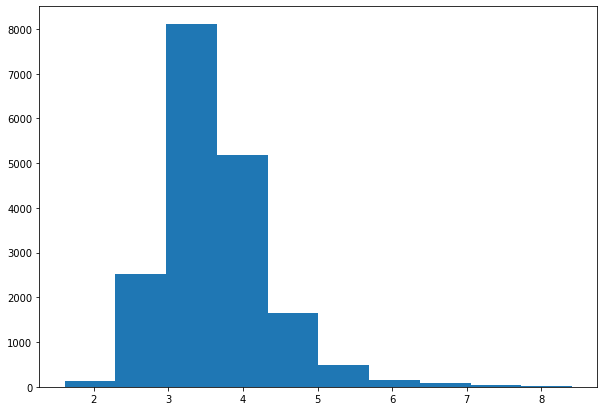

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(df_new1["AvgAmount"]) 
plt.show()

In [ ]:
df_new_norm = (df_new1 - df_new1.mean())/df_new1.std()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
inertia = []
for n_clusters in range(1, 7):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df_new_norm)
    inertia.append(kmeans.inertia_ / n_clusters)
    print("Cluster:",n_clusters,"  ","Intertia-",kmeans.inertia_)

Cluster: 1    Intertia- 55247.999999992746
Cluster: 2    Intertia- 37652.29832523263
Cluster: 3    Intertia- 27340.689391552878
Cluster: 4    Intertia- 21058.457380965992
Cluster: 5    Intertia- 18548.404179184046
Cluster: 6    Intertia- 16448.49158309619


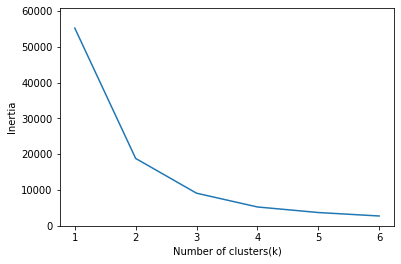

In [ ]:
inertias = pd.DataFrame({'n_clusters': range(1, 7), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Inertia')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(df_new_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
df_new["cluster_id"] = kmeans.labels_

In [ ]:
df_new.head(2)

,Recency,Frequency,AvgAmount,cluster_id
customer_id,,,,
10,3829,1,30.000000,4
80,343,7,71.428571,3


In [ ]:
df_new.groupby("cluster_id").mean()

,Recency,Frequency,AvgAmount
cluster_id,,,
0,699.520418,2.005677,23.878857
1,1019.471004,2.905233,504.523423
2,660.142558,2.184186,65.707700
3,304.385989,9.234432,52.390174
4,2607.625325,1.504944,31.276610


Custer 0 corresponds to first cluster and so on

In [ ]:
df_new=df_new.reset_index()
df_new.head()

,customer_id,Recency,Frequency,AvgAmount,cluster_id
0,10,3829,1,30.000000,4
1,80,343,7,71.428571,3
2,90,758,10,115.800000,3
3,120,1401,1,20.000000,0
4,130,2970,2,50.000000,4


In [ ]:
df_new.groupby("cluster_id").count()

,customer_id,Recency,Frequency,AvgAmount
cluster_id,,,,
0,5461,5461,5461,5461
1,707,707,707,707
2,4300,4300,4300,4300
3,2184,2184,2184,2184
4,5765,5765,5765,5765


In [ ]:
df.head()

,customer_id,purchase_amount,date_of_purchase,Day,Month,Year,weekday,day_since
0,760,25.0,2009-11-06,6,11,2009,4,2247
1,860,50.0,2012-09-28,28,9,2012,4,1190
2,1200,100.0,2005-10-25,25,10,2005,1,3720
3,1420,50.0,2009-07-09,9,7,2009,3,2367
4,1940,70.0,2013-01-25,25,1,2013,4,1071


In [ ]:
df_overall = pd.merge(df, df_new, on='customer_id')

In [ ]:
df_overall.head()

,customer_id,purchase_amount,date_of_purchase,Day,Month,Year,weekday,day_since,Recency,Frequency,AvgAmount,cluster_id
0,760,25.0,2009-11-06,6,11,2009,4,2247,1273,5,38.0,2
1,760,50.0,2008-10-15,15,10,2008,2,2634,1273,5,38.0,2
2,760,60.0,2007-10-17,17,10,2007,2,2998,1273,5,38.0,2
3,760,30.0,2006-12-26,26,12,2006,1,3293,1273,5,38.0,2
4,760,25.0,2012-07-07,7,7,2012,5,1273,1273,5,38.0,2


In [ ]:
df.shape

(51243, 8)

In [ ]:
df_overall.shape

(51243, 12)

In [ ]:
dfcluster1=df_overall.loc[df_overall['cluster_id'] == 1]

In [ ]:
dfcluster1.sort_values(by="Recency").tail(700)
# In this cluster the avg amount is mostly high (>100 per transaction)
# Hence all are high value customers
# In this cluster we have segmented further into 2 parts
# First part corresponds to people with approximately <1000 (2.7 years) recency
# Second part corresponds to the people with apprx >1000 recency.
# This is done because this is the cluster with max recency but also max avg amount value
# So, the offers will be different for people with different recency (first part and second part)
# because the people with max recency (second part) will be lured back by offers.
# and the people with min recency (first part) will be given other offers.

,customer_id,purchase_amount,date_of_purchase,Day,Month,Year,weekday,day_since,Recency,Frequency,AvgAmount,cluster_id
8052,10010,50.0,2006-11-08,8,11,2006,2,3341,825,6,141.666667,1
8054,10010,100.0,2008-11-08,8,11,2008,5,2610,825,6,141.666667,1
8055,10010,150.0,2006-12-31,31,12,2006,6,3288,825,6,141.666667,1
47201,158700,500.0,2013-09-27,27,9,2013,4,826,826,1,500.000000,1
46937,187660,1000.0,2012-12-09,9,12,2012,6,1118,833,2,900.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
50990,32220,200.0,2005-11-25,25,11,2005,4,3689,3689,1,200.000000,1
39302,11790,250.0,2005-11-25,25,11,2005,4,3689,3689,1,250.000000,1
1333,17160,1807.0,2005-04-23,23,4,2005,5,3905,3905,1,1807.000000,1
50839,15410,400.0,2005-04-20,20,4,2005,2,3908,3908,1,400.000000,1


In [ ]:
var=["Day","Month","Year","weekday","cluster_id"] 
df_imp=df_overall[var]

In [ ]:
dfc1=df_imp.loc[df_imp['cluster_id'] == 0]
dfc2=df_imp.loc[df_imp['cluster_id'] == 1]
dfc3=df_imp.loc[df_imp['cluster_id'] == 2]
dfc4=df_imp.loc[df_imp['cluster_id'] == 3]
dfc5=df_imp.loc[df_imp['cluster_id'] == 4]

In [ ]:
colnames=list(dfc1.columns)

In [ ]:
for col in var:
    print(dfc1.groupby(col)['cluster_id'].count())
    print()

Day
1      243
2      220
3      293
4      299
5      399
6      164
7      438
8      328
9      330
10     206
11     244
12     369
13     242
14     225
15     351
16     299
17     363
18     380
19     323
20     296
21     366
22     289
23     587
24     399
25     375
26     242
27     318
28     419
29     313
30     495
31    1138
Name: cluster_id, dtype: int64

Month
1      251
2      366
3      770
4      798
5      696
6      728
7      632
8      385
9      556
10    1377
11    1566
12    2828
Name: cluster_id, dtype: int64

Year
2005      86
2006     195
2007     474
2008     418
2009     563
2010     578
2011    1121
2012    1940
2013    1909
2014    1728
2015    1941
Name: cluster_id, dtype: int64

weekday
0     177
1    1303
2    2753
3    1964
4    2606
5    1867
6     283
Name: cluster_id, dtype: int64

cluster_id
0    10953
Name: cluster_id, dtype: int64



In [ ]:
for col in var:
    print(dfc2.groupby(col)['cluster_id'].count())
    print()

Day
1      43
2      43
3      48
4      51
5      41
6      36
7      68
8      52
9      54
10     44
11     39
12     58
13     32
14     44
15     66
16     54
17     67
18     53
19     54
20     49
21     55
22     60
23     78
24     78
25     66
26     52
27     71
28     58
29     74
30     84
31    382
Name: cluster_id, dtype: int64

Month
1      44
2      43
3      97
4     103
5     155
6     108
7      87
8      47
9     105
10    169
11    240
12    856
Name: cluster_id, dtype: int64

Year
2005     69
2006     84
2007    139
2008    158
2009    158
2010    201
2011    220
2012    236
2013    249
2014    262
2015    278
Name: cluster_id, dtype: int64

weekday
0     81
1    269
2    510
3    371
4    426
5    313
6     84
Name: cluster_id, dtype: int64

cluster_id
1    2054
Name: cluster_id, dtype: int64



In [ ]:
for col in var:
    print(dfc3.groupby(col)['cluster_id'].count())
    print()

Day
1      187
2      199
3      208
4      287
5      333
6      129
7      369
8      259
9      267
10     194
11     215
12     326
13     182
14     205
15     277
16     219
17     349
18     307
19     277
20     276
21     313
22     273
23     436
24     319
25     299
26     242
27     256
28     306
29     269
30     399
31    1215
Name: cluster_id, dtype: int64

Month
1      221
2      269
3      549
4      596
5      547
6      521
7      537
8      272
9      485
10    1038
11    1361
12    2996
Name: cluster_id, dtype: int64

Year
2005      82
2006     148
2007     393
2008     360
2009     508
2010     630
2011     940
2012    1423
2013    1479
2014    1560
2015    1869
Name: cluster_id, dtype: int64

weekday
0     236
1    1187
2    2388
3    1614
4    2197
5    1521
6     249
Name: cluster_id, dtype: int64

cluster_id
2    9392
Name: cluster_id, dtype: int64



In [ ]:
for col in var:
    print(dfc4.groupby(col)['cluster_id'].count())
    print()

Day
1      427
2      465
3      370
4      597
5      589
6      328
7      783
8      602
9      593
10     462
11     491
12     717
13     384
14     519
15     543
16     520
17     707
18     693
19     681
20     651
21     633
22     537
23    1002
24     591
25     675
26     471
27     669
28     707
29     509
30     757
31    2495
Name: cluster_id, dtype: int64

Month
1      549
2      591
3     1380
4     1742
5     1045
6     1185
7     1165
8      518
9     1227
10    2090
11    2283
12    6393
Name: cluster_id, dtype: int64

Year
2005     667
2006     873
2007    1539
2008    1605
2009    2112
2010    2148
2011    2290
2012    2361
2013    2275
2014    2189
2015    2109
Name: cluster_id, dtype: int64

weekday
0     366
1    2149
2    5665
3    3022
4    5264
5    3090
6     612
Name: cluster_id, dtype: int64

cluster_id
3    20168
Name: cluster_id, dtype: int64



In [ ]:
for col in var:
    print(dfc5.groupby(col)['cluster_id'].count())
    print()

Day
1     160
2     228
3     192
4     222
5     197
6     173
7     305
8     187
9     276
10    249
11    226
12    252
13    281
14    266
15    260
16    278
17    274
18    395
19    319
20    345
21    347
22    268
23    431
24    246
25    262
26    238
27    234
28    279
29    228
30    280
31    778
Name: cluster_id, dtype: int64

Month
1      450
2      293
3      482
4      995
5      763
6      584
7      738
8      331
9      395
10     896
11     934
12    1815
Name: cluster_id, dtype: int64

Year
2005     566
2006     882
2007    2129
2008    1790
2009    1713
2010    1382
2011     214
Name: cluster_id, dtype: int64

weekday
0      95
1     718
2    2654
3    1321
4    2335
5    1232
6     321
Name: cluster_id, dtype: int64

cluster_id
4    8676
Name: cluster_id, dtype: int64

